In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [23]:
# Charger les données
train = pd.read_csv("data/train_FD001.txt", sep=r'\s+', header=None)
test = pd.read_csv("data/test_FD001.txt", sep=r'\s+', header=None)
rul = pd.read_csv("data/RUL_FD001.txt", sep=r'\s+', header=None)

# Colonnes
columns = ['unit_nr', 'time_cycles'] + [f'setting_{i}' for i in range(1, 4)] + [f's_{i}' for i in range(1, 22)]
train.columns = columns
test.columns = columns

# Exploration initiale
print("Premières lignes du dataset:")
train.head()

Premières lignes du dataset:


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [33]:
train.columns

Index(['unit_nr', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 's_1',
       's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11',
       's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20',
       's_21'],
      dtype='object')

In [24]:
train.shape

(20631, 26)

In [25]:
test.shape

(13096, 26)

In [26]:
train.isna().sum()

unit_nr        0
time_cycles    0
setting_1      0
setting_2      0
setting_3      0
s_1            0
s_2            0
s_3            0
s_4            0
s_5            0
s_6            0
s_7            0
s_8            0
s_9            0
s_10           0
s_11           0
s_12           0
s_13           0
s_14           0
s_15           0
s_16           0
s_17           0
s_18           0
s_19           0
s_20           0
s_21           0
dtype: int64

In [27]:
print("\nStatistiques descriptives:")
train.describe()


Statistiques descriptives:


,unit_nr,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


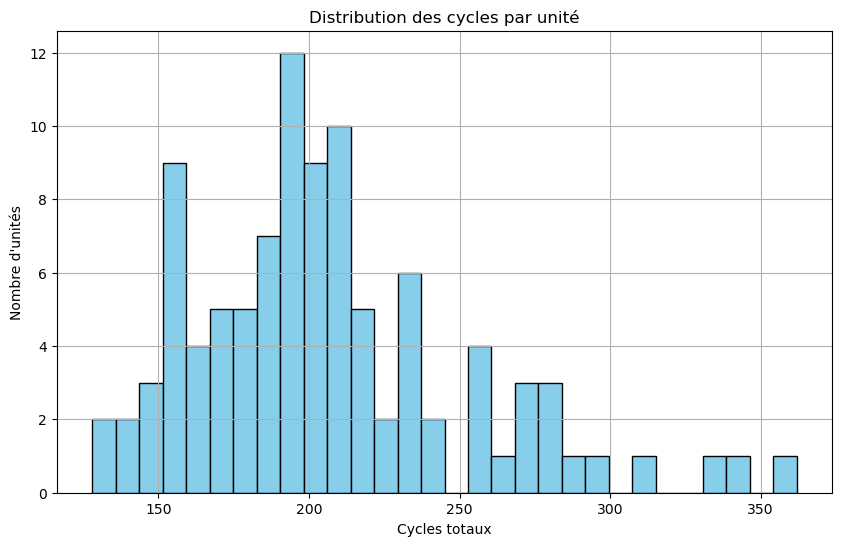

In [28]:
# Analyse de la distribution des cycles par unité
plt.figure(figsize=(10, 6))
train.groupby('unit_nr')['time_cycles'].max().hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution des cycles par unité")
plt.xlabel("Cycles totaux")
plt.ylabel("Nombre d'unités")
plt.show()

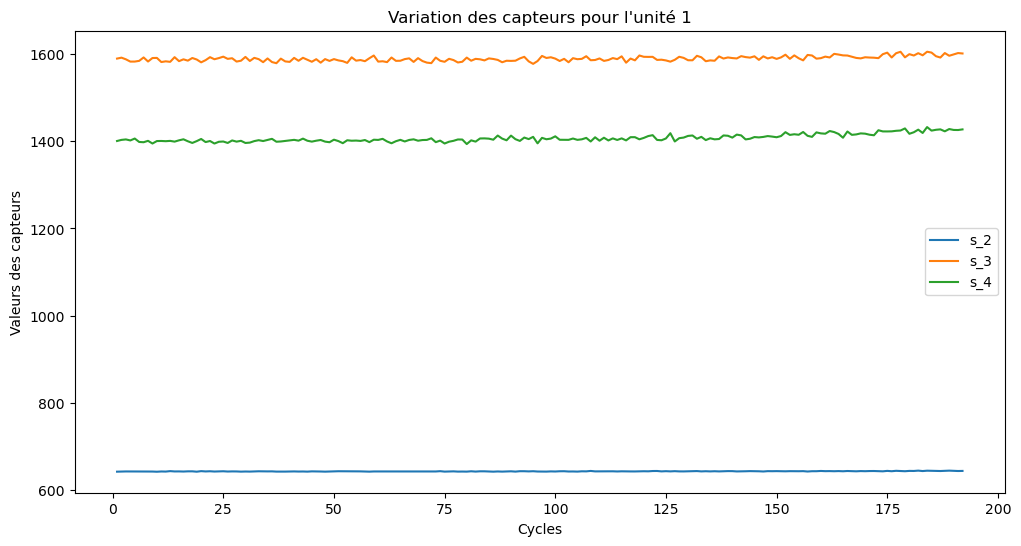

In [35]:
# Analyse temporelle pour les capteurs et les cycles
plt.figure(figsize=(12, 6))
unit = train[train['unit_nr'] == 1]
for sensor in ['s_2', 's_3', 's_4']:
    plt.plot(unit['time_cycles'], unit[sensor], label=sensor)
plt.title("Variation des capteurs pour l'unité 1")
plt.xlabel("Cycles")
plt.ylabel("Valeurs des capteurs")
plt.legend()
plt.show()

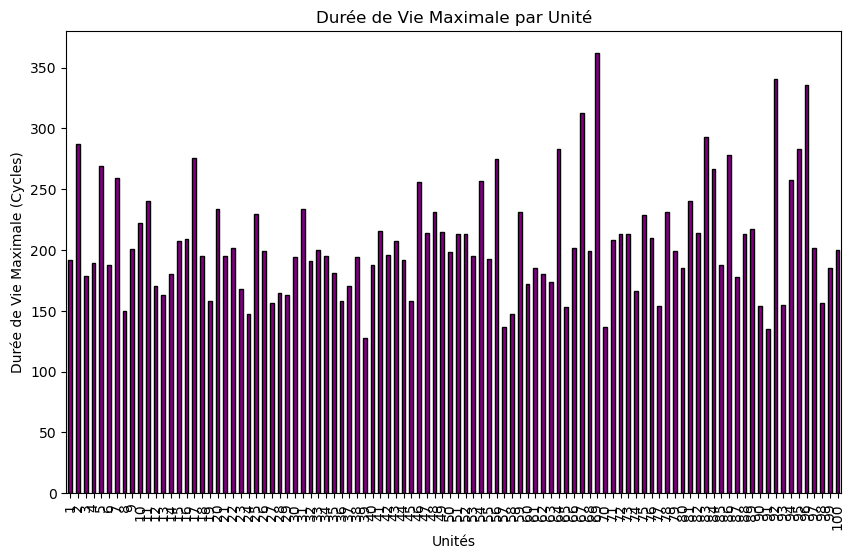

In [43]:
plt.figure(figsize=(10, 6))
train.groupby('unit_nr')['time_cycles'].max().plot(kind='bar', color='purple', edgecolor='black')
plt.title("Durée de Vie Maximale par Unité")
plt.xlabel("Unités")
plt.ylabel("Durée de Vie Maximale (Cycles)")
plt.show()

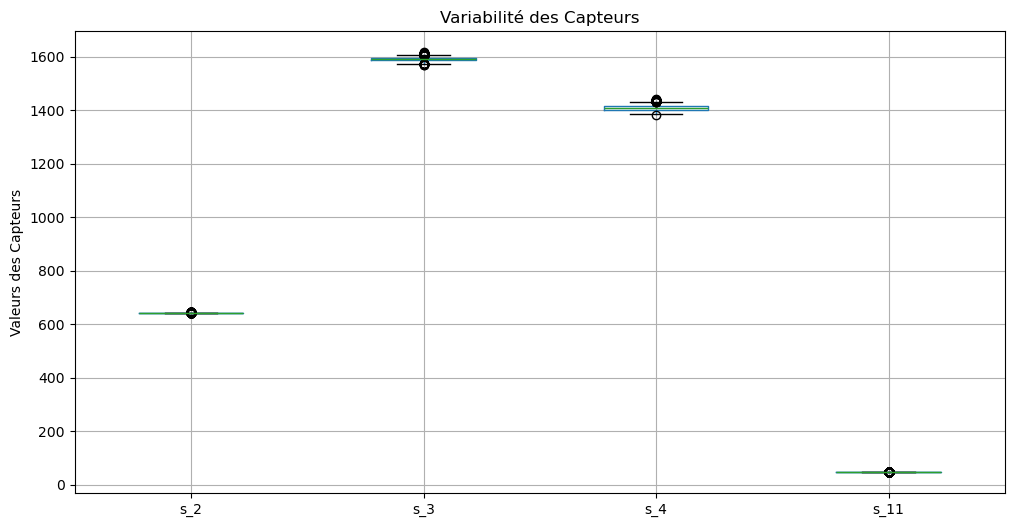

In [44]:
plt.figure(figsize=(12, 6))
selected_sensors = ['s_2', 's_3', 's_4', 's_11']
train[selected_sensors].boxplot()
plt.title("Variabilité des Capteurs")
plt.ylabel("Valeurs des Capteurs")
plt.show()


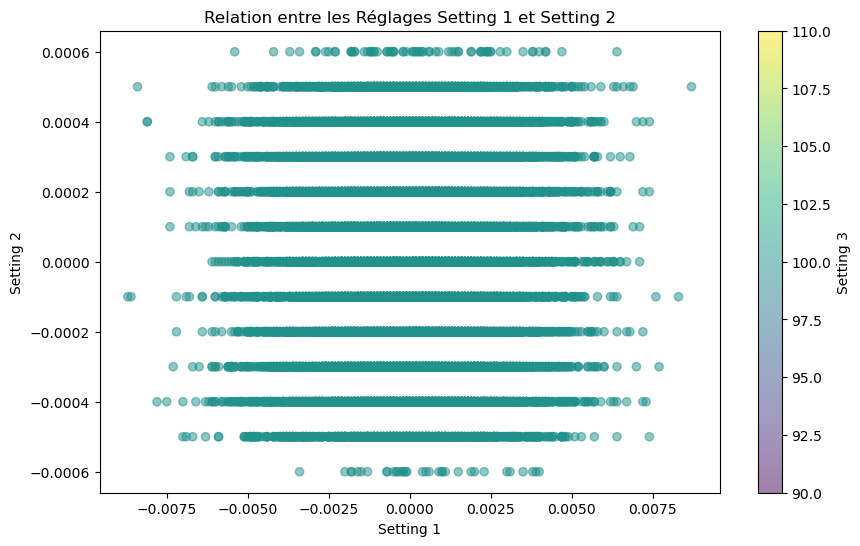

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(train['setting_1'], train['setting_2'], alpha=0.5, c=train['setting_3'], cmap='viridis')
plt.colorbar(label='Setting 3')
plt.title("Relation entre les Réglages Setting 1 et Setting 2")
plt.xlabel("Setting 1")
plt.ylabel("Setting 2")
plt.show()